In [1]:
import os,sys
import numpy as np
import scipy.linalg as la
sys.path.insert(0, os.path.join(os.environ['HOME'],'Projects/quantum-optimal-control/'))

from quantum_optimal_control.helper_functions.grape_functions import *
from quantum_optimal_control.main_grape.grape import Grape
from qutip import *

%reload_ext autoreload
%autoreload 2

/home/bacon/.local/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [58]:
#定义漂移哈密顿量 Defining H drift
freq_ge = 3.9#GHz

sigma_x   = sigmax().full()
I_q = qeye(2).full()
H_drift = Qobj([[0,0],[0,2*np.pi*freq_ge]]).full()

#定义控制场哈密顿量及其名字和最大振幅Defining control Hs
H_ctrls = [sigma_x]
H_ctrls_names =['x']

ops_max_amp = [2*np.pi*0.3] #最大振幅

#设置是态还是幺正算符 Choose optimizing State transfer or Unitary gate
state_transfer = True

#定义目标态Defining U (Target)
U_target = [np.array([0,1])]
#U_target = np.array([[0,1],[1,0]])
#定义总时间和分段数Defining time scales
total_time = 6.0
steps =600

#定义初态Defining Concerned states (starting states)
psi0=[np.array([1,0])]
#Defining U0 (Initial)
U0= qeye(2).full()


data saved at: ../pulses/output_pulses/00050_spin_pi_speed_up.h5


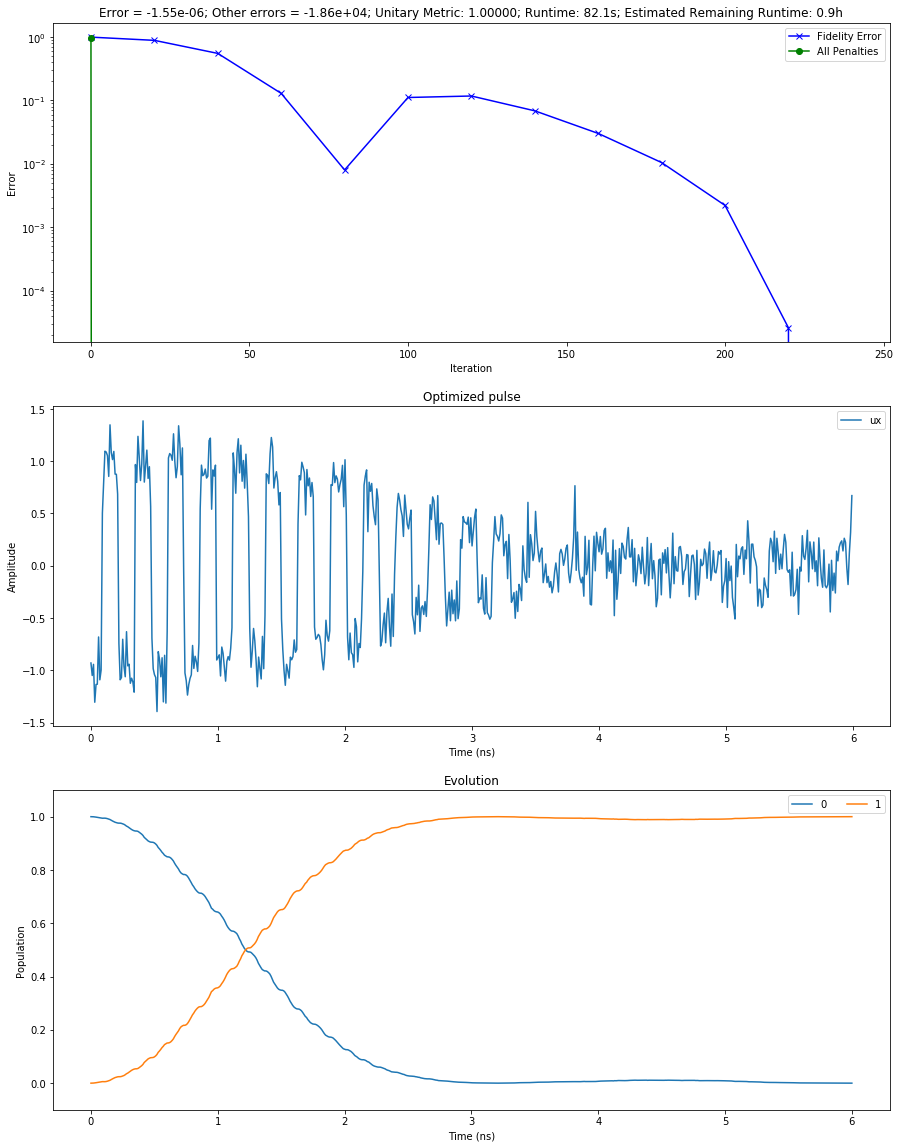

In [66]:
#定义要画的态  Defining states to include in the drawing of occupation
states_draw_list = [0,1]
states_draw_names = ['0','1']
draw = [states_draw_list,states_draw_names]
#定义Defining convergence parameters
convergence = {'rate':0.001, 
               'update_step':20, 
               'max_iterations':10000,
               'conv_target':1e-7,
               'learning_rate_decay':5000, 
               'min_grad': 1e-7}
# guassian envelope pulse
reg_coeffs = {#'amplitude':1,
              'envelope':5.0, #高斯波包化
              'dwdt':0.001,#一阶导数平滑
              #'d2wdt2':0.000001, #二阶导数平滑
              'speed_up':100, #加速演化
             }

uks,U_final = Grape(H_drift,H_ctrls,H_ctrls_names,U_target,total_time,steps,psi0,
                    #maxA=ops_max_amp, #控制场最大振幅
                    state_transfer=state_transfer, #态还是幺正算符
                    show_plots = True, #画态还是进度条,进度条模式更快
                    draw = draw, #画哪些态
                    #unitary_error = 1e-4, #泰勒展开误差
                    #method = 'Adam',  #优化算法
                    Taylor_terms = [20,0], #泰勒展开项数
                    convergence=convergence, 
                    reg_coeffs=reg_coeffs, 
                    use_gpu=False,
                    sparse_H=False, #稀疏矩阵
                    file_name='spin_pi_speed_up',
                    data_path = '../pulses/output_pulses/')